In [1]:
# Data Wrangling

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib jpn support
import japanize_matplotlib

# dataframe display function
from IPython.display import display

# diaply adjustment
# numpy float display adjustment
np.set_printoptions(suppress = True, precision = 4)

# pandas float display adjustment
pd.options.display.float_format = '{:.4f}'.format

# show all columns of dataframe
pd.set_option('display.max_columns', None)

# default font
plt.rcParams['font.size'] = 12

# set random number
random_seed = 123

オリジナルURL  
http://archive.ics.uci.edu/ml/datasets/Online+Retail/

**データ項目メモ**

InvoiceNo:  発注番号  
StockCode: 商品番号  
Description: 商品説明  
Quantity: 商品個数   
InvoiceDate: 明細書発行日  
UnitPrice:  商品単価  
CustomerID: 顧客番号  
Country: 国名  

### data import and verification

In [2]:
# data import
# data size = 23MB
df = pd.read_excel('/Users/satoshiido/Documents/Coding_general/Business_AI/data/Online Retail.xlsx')

# change columns name into Japanese
columns = [
    '発注番号', '商品番号', '商品説明', '商品個数', '明細書発行日',
    '商品単価', '顧客番号', '国名'
]

df.columns = columns

In [3]:
# data shape
print(df.shape[0])

# sample data
display(df.head())

541909


,発注番号,商品番号,商品説明,商品個数,明細書発行日,商品単価,顧客番号,国名
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5500,17850.0000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.7500,17850.0000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom


In [4]:
# missing value
print(df.isnull().any())

発注番号      False
商品番号      False
商品説明       True
商品個数      False
明細書発行日    False
商品単価      False
顧客番号       True
国名        False
dtype: bool


In [5]:
# country names
print(df['国名'].value_counts().head(10))

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: 国名, dtype: int64


### data preprocessing
方針:   
* 発注番号の最初の1文字を抽出、「発注種別」列を作る
* 「発注種別」を基に新規オーダーのみを抽出
* 対象国をフランスに限定
* データをone hot形式(商品ごとに列を持つ形)に変換

#### extracting new orders

In [6]:
# add column `発注種別`

# copy
df2 = df.copy()

# extract first digit of `発注番号` and add to a different column
# only first digit has meanings (5: 新規オーダー  C:キャンセル) so extract them
df2['発注種別'] = df2['発注番号'].map(lambda x: str(x)[0])

# results
display(df2.head())

# value counts
print(df2['発注種別'].value_counts())

,発注番号,商品番号,商品説明,商品個数,明細書発行日,商品単価,顧客番号,国名,発注種別
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5500,17850.0000,United Kingdom,5
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom,5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.7500,17850.0000,United Kingdom,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom,5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom,5


5    532618
C      9288
A         3
Name: 発注種別, dtype: int64


In [7]:
# extract only new orders
df2 = df2[df2['発注種別'] == '5']

# number
print(df2.shape[0])

532618


#### extract France

In [8]:
# only France
df3 = df2[df2['国名'] == 'France']

# shape
print(df3.shape[0])

8408


#### one-hot formalization

In [9]:
# set `発注番号`, `商品番号` as keys to count `商品個数`
w1 = df3.groupby(['発注番号', '商品番号'])['商品個数'].sum()

# results
print(w1.head())

発注番号    商品番号 
536370  10002    48
        21035    18
        21724    12
        21731    24
        21791    24
Name: 商品個数, dtype: int64


In [10]:
# unstack
w2 = w1.unstack().reset_index().fillna(0).set_index('発注番号')

# data size
print(w2.shape)

# results
display(w2.head())

(392, 1542)


商品番号     10002  10120  10125  10135  11001  15036  15039  16012  16048  16218  \
発注番号                                                                            
536370 48.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536852  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536974  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
537065  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
537463  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

商品番号    16219  16225  16236  16237   16238  17174  20615  20617  20658  20665  \
発注番号                                                                            
536370 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536852 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536974 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
537065 0.0000 0.0000 0.0000 0.0000 28.0000 0.0000 0.0000 0.0000 0.0000 6.0000   
537463 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

商品番号    20668  20674  20675  20676  20677  20679  20681  20682  20684  20685  \
発注番号                                                                           
536370 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536852 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536974 0.0000 0.0000 0.0000 0.0000 0.0000 6.0000 0.0000 0.0000 0.0000 0.0000   
537065 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
537463 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 6.0000 6.0000 0.0000 0.0000   

商品番号    20686  20702  20704  20711  20712  20713  20717  20718   20719  20723  \
発注番号                                                                            
536370 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000   
536852 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000   
536974 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000   
537065 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  0.0000 0.0000   
537463 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 10.0000 0.0000   

商品番号    20724   20725   20726  20727   20728  20749  20750  20751  20767  \
発注番号                                                                       
536370 0.0000  0.0000  0.0000 0.0000  0.0000 0.0000 0.0000 0.0000 0.0000   
536852 0.0000  0.0000  0.0000 0.0000  0.0000 0.0000 0.0000 0.0000 0.0000   
536974 0.0000 10.0000 10.0000 0.0000  0.0000 2.0000 2.0000 0.0000 0.0000   
537065 0.0000 10.0000 20.0000 0.0000 10.0000 2.0000 6.0000 0.0000 0.0000   
537463 0.0000  0.0000  0.0000 0.0000  0.0000 0.0000 0.0000 0.0000 0.0000   

商品番号    20777  20819  20832  20866  20914  20961  20963  20966  20967  20971  \
発注番号                                                                           
536370 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536852 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536974 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
537065 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
537463 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

商品番号    20972  20973  20974  20975  20977  20978  20979  20981  20983  20984  \
発注番号                                                                           
536370 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536852 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
536974 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
537065 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
537463 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

商品番号    20992  20996  21003  21012  21026  21027  21030  21034   21035  21039  \

In [11]:
# set True/False based on the number is 0 or not
basket_df = w2.apply(lambda x: x > 0)

# results
display(basket_df.head())

商品番号    10002  10120  10125  10135  11001  15036  15039  16012  16048  16218  \
発注番号                                                                           
536370   True  False  False  False  False  False  False  False  False  False   
536852  False  False  False  False  False  False  False  False  False  False   
536974  False  False  False  False  False  False  False  False  False  False   
537065  False  False  False  False  False  False  False  False  False  False   
537463  False  False  False  False  False  False  False  False  False  False   

商品番号    16219  16225  16236  16237  16238  17174  20615  20617  20658  20665  \
発注番号                                                                           
536370  False  False  False  False  False  False  False  False  False  False   
536852  False  False  False  False  False  False  False  False  False  False   
536974  False  False  False  False  False  False  False  False  False  False   
537065  False  False  False  False   True  False  False  False  False   True   
537463  False  False  False  False  False  False  False  False  False  False   

商品番号    20668  20674  20675  20676  20677  20679  20681  20682  20684  20685  \
発注番号                                                                           
536370  False  False  False  False  False  False  False  False  False  False   
536852  False  False  False  False  False  False  False  False  False  False   
536974  False  False  False  False  False   True  False  False  False  False   
537065  False  False  False  False  False  False  False  False  False  False   
537463  False  False  False  False  False  False   True   True  False  False   

商品番号    20686  20702  20704  20711  20712  20713  20717  20718  20719  20723  \
発注番号                                                                           
536370  False  False  False  False  False  False  False  False  False  False   
536852  False  False  False  False  False  False  False  False  False  False   
536974  False  False  False  False  False  False  False  False  False  False   
537065  False  False  False  False  False  False  False  False  False  False   
537463  False  False  False  False  False  False  False  False   True  False   

商品番号    20724  20725  20726  20727  20728  20749  20750  20751  20767  20777  \
発注番号                                                                           
536370  False  False  False  False  False  False  False  False  False  False   
536852  False  False  False  False  False  False  False  False  False  False   
536974  False   True   True  False  False   True   True  False  False  False   
537065  False   True   True  False   True   True   True  False  False  False   
537463  False  False  False  False  False  False  False  False  False  False   

商品番号    20819  20832  20866  20914  20961  20963  20966  20967  20971  20972  \
発注番号                                                                           
536370  False  False  False  False  False  False  False  False  False  False   
536852  False  False  False  False  False  False  False  False  False  False   
536974  False  False  False  False  False  False  False  False  False  False   
537065  False  False  False  False  False  False  False  False  False  False   
537463  False  False  False  False  False  False  False  False  False  False   

商品番号    20973  20974  20975  20977  20978  20979  20981  20983  20984  20992  \
発注番号                                                                           
536370  False  False  False  False  False  False  False  False  False  False   
536852  False  False  False  False  False  False  False  False  False  False   
536974  False  False  False  False  False  False  False  False  False  False   
537065  False  False  False  False  False  False  False  False  False  False   
537463  False  False  False  False  False  False  False  False  False  False   

商品番号    20996  21003  21012  21026  21027  21030  21034  21035  21039  21

### create dictionary for "商品名"

[Support page](https://github.com/makaishi2/profitable_ai_book_info/blob/master/docs/C2-実習コーディング補足解説.md#C21)

#### correspondence table of "商品番号" and "商品説明" for later analysis

In [12]:
# extract `商品番号` and `商品説明`
w3 = df2[['商品番号', '商品説明']].drop_duplicates()

# convert `商品番号` and `商品名` to strings
w3['商品番号'] = w3['商品番号'].astype('str')
w3['商品説明'] = w3['商品説明'].astype('str')

# set `商品番号` as index
w3 = w3.set_index('商品番号')
display(w3.head())

,商品説明
商品番号,
85123A,WHITE HANGING HEART T-LIGHT HOLDER
71053,WHITE METAL LANTERN
84406B,CREAM CUPID HEARTS COAT HANGER
84029G,KNITTED UNION FLAG HOT WATER BOTTLE
84029E,RED WOOLLY HOTTIE WHITE HEART.


In [13]:
# first 5 indexes as samples
item_list1 = w3.index[:5]

# search results of sample index
display(w3.loc[item_list1])

,商品説明
商品番号,
85123A,WHITE HANGING HEART T-LIGHT HOLDER
85123A,?
85123A,wrongly marked carton 22804
85123A,CREAM HANGING HEART T-LIGHT HOLDER
71053,WHITE METAL LANTERN
71053,WHITE MOROCCAN METAL LANTERN
84406B,CREAM CUPID HEARTS COAT HANGER
84406B,incorrectly made-thrown away.
84406B,?


In [14]:
# extract texts with only capital letters

# copy
w4 = w3.copy()

# leave only rows with all capital letters
w4 = w4[w4['商品説明'].map(lambda x: x.isupper())]

# verify with item_list1
display(w4.loc[item_list1])

,商品説明
商品番号,
85123A,WHITE HANGING HEART T-LIGHT HOLDER
85123A,CREAM HANGING HEART T-LIGHT HOLDER
71053,WHITE METAL LANTERN
71053,WHITE MOROCCAN METAL LANTERN
84406B,CREAM CUPID HEARTS COAT HANGER
84029G,KNITTED UNION FLAG HOT WATER BOTTLE
84029E,RED WOOLLY HOTTIE WHITE HEART.


#### plan for adjusting multiple titles
when there are multiple titles, pick the longest one and make it 'item_dict'

In [41]:
# extract longest title

# copy
w5 = w4.copy()

# add `文字数` column
w5['文字数'] = w5['商品説明'].map(len)

# sort
w5 = w5.sort_values(['商品番号', '文字数'], ascending = [True, False])

# extract the longest `商品番号` and add to `item_dict`
item_dict = w5.groupby('商品番号')['商品説明'].agg(lambda x: x[0])

# results
display(item_dict.loc[item_list1])

商品番号
85123A     WHITE HANGING HEART T-LIGHT HOLDER
71053            WHITE MOROCCAN METAL LANTERN
84406B         CREAM CUPID HEARTS COAT HANGER
84029G    KNITTED UNION FLAG HOT WATER BOTTLE
84029E         RED WOOLLY HOTTIE WHITE HEART.
Name: 商品説明, dtype: object

In [39]:
w5.groupby('商品番号')['商品説明'].agg(lambda x: x[0])

商品番号
10002        INFLATABLE POLITICAL GLOBE 
10080           GROOVY CACTUS INFLATABLE
10120                       DOGGY RUBBER
10123C             HEARTS WRAPPING TAPE 
10124A       SPOTS ON RED BOOKCOVER TAPE
                        ...             
DCGSSGIRL                GIRLS PARTY BAG
DOT                       DOTCOM POSTAGE
PADS          PADS TO MATCH ALL CUSHIONS
POST                             POSTAGE
S                                SAMPLES
Name: 商品説明, Length: 3891, dtype: object

### algorithm selection and analysis

use 'associateion_rules' and 'appriori' from 'mlxtend' library

In [42]:
# library
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [44]:
# apriori analysis

# set minimal support thres = 0.06 and extract itemsets with over 0.06 support
freq_items1 = apriori(basket_df, min_support = 0.06, use_colnames = True)

# results 
display(freq_items1.sort_values('support', ascending = False).head(10))

# itemset count
print(freq_items1.shape[0])

,support,itemsets
61,0.7653,(POST)
52,0.1888,(23084)
14,0.1811,(21731)
37,0.1709,(22554)
39,0.1684,(22556)
114,0.1658,"(POST, 23084)"
24,0.1582,(22326)
82,0.1582,"(POST, 21731)"
4,0.1531,(20725)
89,0.1480,"(POST, 22326)"


134


In [46]:
# extract association rule

a_rules1 = association_rules(freq_items1, metric = 'lift', min_threshold = 1)

# sort by lift value
a_rules1 = a_rules1.sort_values('lift', ascending = False).reset_index(drop = True)

# result
display(a_rules1.head(10))

# rule count
print(a_rules1.shape[0])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(23254),(23256),0.0714,0.0689,0.0638,0.8929,12.9630,0.0589,8.6905
1,(23256),(23254),0.0689,0.0714,0.0638,0.9259,12.9630,0.0589,12.5357
2,(22727),"(22728, 22726)",0.0944,0.0740,0.0638,0.6757,9.1333,0.0568,2.8552
3,"(22728, 22726)",(22727),0.0740,0.0944,0.0638,0.8621,9.1333,0.0568,6.5657
4,(22727),"(POST, 22726)",0.0944,0.0842,0.0714,0.7568,8.9894,0.0635,3.7650
5,"(POST, 22726)",(22727),0.0842,0.0944,0.0714,0.8485,8.9894,0.0635,5.9770
6,(22726),"(22728, 22727)",0.0969,0.0740,0.0638,0.6579,8.8929,0.0566,2.7068
7,"(22728, 22727)",(22726),0.0740,0.0969,0.0638,0.8621,8.8929,0.0566,6.5472
8,(22727),(22726),0.0944,0.0969,0.0791,0.8378,8.6430,0.0699,5.5689
9,(22726),(22727),0.0969,0.0944,0.0791,0.8158,8.6430,0.0699,4.9162


206


In [47]:
# pick list of highly correlated itemsets
item_list = ['23254', '23256', '22726', '22727', '22728']

# check with item names
for item in item_list:
    print(item, item_dict[item])

23254 CHILDRENS CUTLERY DOLLY GIRL 
23256 CHILDRENS CUTLERY SPACEBOY 
22726 ALARM CLOCK BAKELIKE GREEN
22727 ALARM CLOCK BAKELIKE RED 
22728 ALARM CLOCK BAKELIKE PINK


### tuning

change 'min_support' to 0.065 from 0.06

In [48]:
# apriori analysis
freq_items2 = apriori(basket_df, min_support = 0.065, use_colnames = True)

# extract association rules
# set minimal threshold = 1
a_rules2 = association_rules(freq_items2, metric = 'lift', min_threshold = 1)

# sort lift
a_rules2 = a_rules2.sort_values('lift', ascending = False).reset_index(drop = True)

# result
display(a_rules1.head(10))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(23254),(23256),0.0714,0.0689,0.0638,0.8929,12.9630,0.0589,8.6905
1,(23256),(23254),0.0689,0.0714,0.0638,0.9259,12.9630,0.0589,12.5357
2,(22727),"(22728, 22726)",0.0944,0.0740,0.0638,0.6757,9.1333,0.0568,2.8552
3,"(22728, 22726)",(22727),0.0740,0.0944,0.0638,0.8621,9.1333,0.0568,6.5657
4,(22727),"(POST, 22726)",0.0944,0.0842,0.0714,0.7568,8.9894,0.0635,3.7650
5,"(POST, 22726)",(22727),0.0842,0.0944,0.0714,0.8485,8.9894,0.0635,5.9770
6,(22726),"(22728, 22727)",0.0969,0.0740,0.0638,0.6579,8.8929,0.0566,2.7068
7,"(22728, 22727)",(22726),0.0740,0.0969,0.0638,0.8621,8.8929,0.0566,6.5472
8,(22727),(22726),0.0944,0.0969,0.0791,0.8378,8.6430,0.0699,5.5689
9,(22726),(22727),0.0969,0.0944,0.0791,0.8158,8.6430,0.0699,4.9162


from results of apiori analysis, pick columns related to '23254' and '23256'

In [50]:
# set of subjects of a survey
t_set = set([23254, 23256])

# from 1st apriori analysis; freq_item1, pick the corresponding line
idx1 = freq_items1['itemsets'].map(
    # isdisjoint = 集合が他の集合と互いに素かどうか
    lambda x: not x.isdisjoint(t_set))
item1 = freq_items1[idx1]

idx2 = freq_items2['itemsets'].map(
    lambda x: not x.isdisjoint(t_set))
item2 = freq_items2[idx2]

### graph display
Display directed graphs of relationships between products

[support page](https://github.com/makaishi2/profitable_ai_book_info/blob/master/docs/C2-実習コーディング補足解説.md#C22) 

#### extract node

In [55]:
# limit best 20  `lift` value of targed relationship 
a = a_rules1.head(20)

# parent node
ant = a['antecedents'].values
ant = [tuple(x) for x in ant]

# child node
con = a['consequents'].values
con = [tuple(x) for x in con]

# list of every node
both = ant + con
both = list(set(both))

# results
print(both[:10])

[(21080, 21086), (22726, 22727), (22728, 22727), (23254,), (21094,), (22727,), ('POST', 22727), (22728, 22726), (22726,), ('POST', 22726)]


#### build relationship graph

In [62]:
# import networkx
import networkx as nx

# empty graph
G = nx.DiGraph()

# add nodes
for n in both:
    G.add_node(n)

# add edge
for i in range(len(a)):
    item = a.loc[i]
    ant = tuple(item['antecedents'])
    con = tuple(item['consequents'])
    # connect `ant` and `con` as edges
    G.add_edge(ant, con)

#### graph display

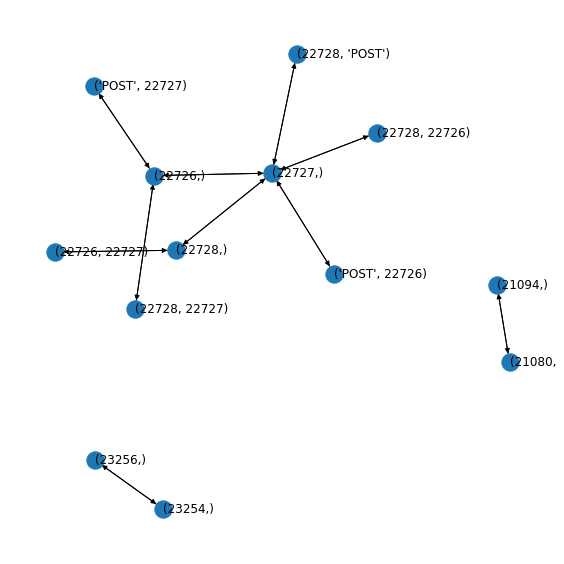

In [63]:
# ノード間の反発力と、エッジのweightの大きさによる吸引力でノードの位置が決定される
pos = nx.spring_layout(G, k = 0.6, seed = random_seed)

plt.figure(figsize = (8, 8))
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, 
    horizontalalignment = 'left',
    verticalalignment = 'center')
plt.axis('off')
plt.tight_layout()
plt.show()